## CNN Introduction:

CNN, or Cable News Network, is a major global news organization known for its 24-hour television news coverage and its online presence. Founded in 1980 by media mogul Ted Turner, CNN was the first channel to provide 24-hour television news coverage, revolutionizing the way people consume news.

CNN's programming covers a wide range of topics including politics, business, entertainment, technology, health, and more. It has correspondents and bureaus around the world, allowing it to provide extensive coverage of international events as well as domestic news.

In addition to its television network, CNN has a significant online presence through its website, where users can access articles, videos, and live streams of CNN's programming. The network is known for its breaking news coverage, analysis, and in-depth reporting on major events and issues.

Over the years, CNN has become one of the most recognized and trusted news brands globally, and its coverage often shapes public opinion and influences decision-makers around the world.

In [1]:
#Import the required library :
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import save_model

In [2]:
# Get the current directory
current_dir = os.getcwd()

# Get the parent directory (one level up)
current_dir = os.path.dirname(current_dir)

# Get the parent directory (one level up)
parent_dir = os.path.dirname(current_dir)

# Print the parent directory
print("Parent Directory:", parent_dir)

Parent Directory: E:\upgrade_capston_project-main


In [3]:
# Load the processed data
preprocessed_train_datasets = tf.data.Dataset.load(parent_dir +'/datasets/processed_dataset/cnn_preprocessed_train_datasets.tfrecord')
preprocessed_test_datasets = tf.data.Dataset.load(parent_dir+'/datasets/processed_dataset/cnn_preprocessed_test_datasets.tfrecord')
preprocessed_validation_dataset = tf.data.Dataset.load( parent_dir+'/datasets/processed_dataset/cnn_preprocessed_validation_dataset.tfrecord')


In [4]:
print(preprocessed_train_datasets)

<_LoadDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


## Model Building
1. Sequential model intiation to bind layers in one model
2. Con2D layer intiated for as our data is converted into 2 D and filter count is 32 and kernel size is 3X3
   Activation function is RELU .
3. MaxPool is chossen to extract the feature and dimentionality reduction

In [5]:
# Image size
image_size = (256,256,3)

In [6]:
# Sequential Model to connect multiple layers
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape = image_size))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(32,(2,2), activation='relu'))

F:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           8,224 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,544 (252.12 KB)

 Trainable params: 64,544 (252.12 KB)

 Non-trainable params: 0 (0.00 B)

# Adding few more layers
1. inserting a layer that reshapes the input data into a flat array, making it suitable for passing to subsequent fully connected layers.
2.  it indicates the construction of a neural network with a hidden layer of 64 neurons using ReLU activation, followed by an output layer with 2 neurons (representing classes) using softmax activation for a classification task.

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(2,activation='softmax'))

In [9]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 26912)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,722,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,787,106 (6.82 MB)

 Trainable params: 1,787,106 (6.82 MB)

 Non-trainable params: 0 (0.00 B)

## Model Compile

model.compile: This function configures the model for training. It's where you specify the loss function, optimizer, and metrics to monitor during training.

loss='sparse_categorical_crossentropy': This parameter specifies the loss function to use during training.

'sparse_categorical_crossentropy': This is a specific loss function used for categorical classification tasks where the labels are integers (e.g., 0, 1, 2, etc.) and not one-hot encoded. It computes the cross-entropy loss between the true labels and the predicted probabilities.
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate): This parameter specifies the optimizer to use for updating the weights of the neural network during training.

tf.keras.optimizers.Adam: This is an instance of the Adam optimizer, which is an adaptive learning rate optimization algorithm. It's well-suited for a wide range of optimization problems and is widely used in deep learning.
learning_rate=learning_rate: This parameter specifies the learning rate to be used by the optimizer. The actual value of learning_rate would be defined elsewhere in your code.
metrics=['accuracy']: This parameter specifies the metrics to be evaluated during training and testing.

['accuracy']: This specifies that you want to monitor the accuracy of the model during training and testing. Accuracy is a common metric used in classification tasks, representing the proportion of correctly classified samples.


In [10]:
learning_rate = 0.001

In [11]:
model.compile(loss= 'sparse_categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),metrics = ['accuracy'])

## Train The Model

In [12]:
history = model.fit(preprocessed_train_datasets,epochs=10,validation_data=preprocessed_validation_dataset)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 409s 8s/step - accuracy: 0.5359 - loss: 0.6972 - val_accuracy: 0.6295 - val_loss: 0.6786
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.6254 - loss: 0.6652 - val_accuracy: 0.6652 - val_loss: 0.6149
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.6686 - loss: 0.6143 - val_accuracy: 0.6786 - val_loss: 0.6042
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.6967 - loss: 0.5955 - val_accuracy: 0.6786 - val_loss: 0.6046
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.7089 - loss: 0.5666 - val_accuracy: 0.6607 - val_loss: 0.6293
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 222s 5s/step - accuracy: 0.7209 - loss: 0.5284 - val_accuracy: 0.6696 - val_loss: 0.6114
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 328s 7s/step - accuracy: 0.7718 - loss: 0.4819 - val_accuracy: 0.6652 - val_loss: 0.6850
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.7820 - loss: 0.4612 - val_accuracy: 0.6473 - v

## Plot the accuracy of train and validation dataset

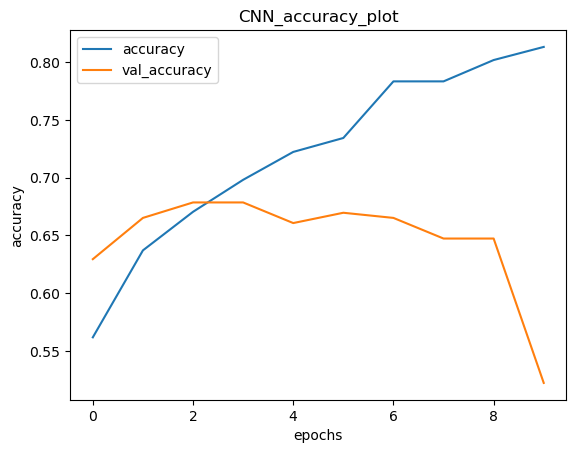

In [13]:
plt.plot(history.history['accuracy'],label= 'accuracy')
plt.plot(history.history['val_accuracy'],label= 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title("CNN_accuracy_plot")
plt.savefig(parent_dir+'\\visuals\\CNN_accuracy_plot.png')

## Plot the loss of train and validation dataset

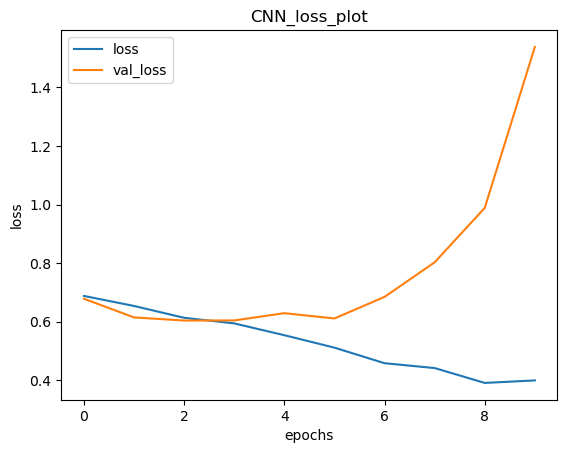

In [14]:
plt.plot(history.history['loss'],label= 'loss')
plt.plot(history.history['val_loss'],label= 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title("CNN_loss_plot")
plt.savefig(parent_dir+'\\visuals\\CNN_loss_plot.png')

## Save the model

In [15]:
save_model(model , parent_dir+"/models/cnn_model.keras")